<a href="https://colab.research.google.com/github/Data-Analytics-with-Python/individual-assignment-i-DarshanDC/blob/main/Assignment_Notebook_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

IMPORTANT: Before you start, enter your name and student number below.

**Full Name:Darshan Dev Choudhury**

**Student Number:400481805**

# Exploring Customer Data with Pandas

Use the provided Nata Supermarkets dataset to answer the following questions.
Your goal is to use Pandas operations to explore, clean, and summarize the data, and to draw a few simple insights about customer demographics and behavior.

Please complete all task requested and answer all questions explicitly and support your answers with Python codes. Insert code and text cells as you need.

## 1. Inspecting and loading the Data (10pts)

* Save the dataset in the case supplementary file (in Excel) as a csv file.

* Load the dataset as a pandas data frame and display the first few rows. (Note: you may upload it to your Colab storage space and load it from there.)

    * How many features (columns) and records (rows) are in the dataset?

In [19]:
# --- Inspecting and Loading the Dataset ---

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load Excel file
file_path = "/content/W33836-XLS-ENG.xlsx"   # adjust path if needed
df = pd.read_excel(file_path)

# Show first few rows
df.head()

# Check number of rows and columns
print("Number of rows:", df.shape[0])
print("Number of columns:", df.shape[1])

# Check data types and basic info
df.info()

# Quick summary statistics
df.describe()

# Check for missing values
print("\nMissing values in each column:")
print(df.isnull().sum())



Number of rows: 2240
Number of columns: 29
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  


There are 29 features which are in the form of coloumns, and 2240 records.

## 2. Data Cleaning and Missing Values (14pts)

* Check for missing values across all columns.

* Which columns contain missing data, and how many missing entries are there?

* What strategies could you use to handle them (drop, fill, or ignore)? Apply one reasonable approach and explain your choice.

In [32]:
# Check missing values across all columns
missing_values = df.isnull().sum()
print("Missing values per column:\n")
print(missing_values[missing_values > 0])

# Count total missing cells
print("\nTotal missing values in dataset:", df.isnull().sum().sum())

# Strategy:
#  - Income usually has a few missing entries.
#  - Instead of dropping those rows (losing customers), we can fill them with the median income.

# Fill missing Income values with the median
median_income = df['Income'].median()
df['Income'] = df['Income'].fillna(median_income)

# Verify that missing values are handled
print("\nAfter filling missing values:")
print(df.isnull().sum()[df.isnull().sum() > 0])


Missing values per column:

Series([], dtype: int64)

Total missing values in dataset: 0

After filling missing values:
Series([], dtype: int64)


A reasonable strategy to handle missing data is to fill missing values instead of dropping them, especially if the missing data represents a small portion of the dataset. For example, for numerical columns like Income, using the median is a good approach as it preserves the distribution and avoids introducing bias from outliers. Filling missing values ensures that we retain all rows in the dataset for further analysis.

## 3. Removing Constant Columns (14pts)

* Identify any columns with constant values (no variance; all rows have the same value).

* Drop them from your DataFrame and confirm how many columns remain.

In [49]:
# Work on the cleaned dataframe from previous step
df_constant = df.copy()  # Replace df with your cleaned dataframe variable name if different

# Identify columns with constant values (no variance)
constant_cols = [col for col in df_constant.columns if df_constant[col].nunique() == 1]

print("=== Constant Columns (no variance) ===")
if len(constant_cols) == 0:
    print("No constant columns found.")
else:
    print(constant_cols)

# Drop them (if any)
df_constant.drop(columns=constant_cols, inplace=True)

# Confirm how many columns remain
print(f"\nOriginal columns: {len(df.columns)}")
print(f"Columns removed:  {len(constant_cols)}")
print(f"Columns remaining: {len(df_constant.columns)}")

# Optional: verify if any removed column had constant values
for col in constant_cols:
    if col in df.columns:
        print(f"{col}: unique values ->", df[col].unique())


=== Constant Columns (no variance) ===
['Z_CostContact', 'Z_Revenue']

Original columns: 29
Columns removed:  2
Columns remaining: 27
Z_CostContact: unique values -> [3]
Z_Revenue: unique values -> [11]


## 4. Add a new column (15pts)

* Add a new column **Customer_Days** to store the total number of days each customer has been with the company. You may follow the steps below:
  * use `pd.to_datetime(df["Dt_Customer"])` to convert the string variable to a *date-time* variable

  * use `today = datetime.today()` to find the date of today

  * use `(today - df["Dt_Customer"]).dt.days` to find the difference between today and the onbard date.

In [28]:
import datetime

# Convert 'Dt_Customer' to datetime format
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])

# Get today's date
today = datetime.datetime.today()

# Calculate the number of days each customer has been with the company
df['Customer_Days'] = (today - df['Dt_Customer']).dt.days

# Display the first few rows to confirm the new column
df[['ID', 'Dt_Customer', 'Customer_Days']].head()


,ID,Dt_Customer,Customer_Days
0,5524,2012-04-09,4944
1,2174,2014-08-03,4098
2,4141,2013-08-21,4445
3,6182,2014-10-02,4038
4,5324,2014-01-19,4294


## 5. Categorical Features (15 pts)

* For `Education` and `Marital_Status`,

  * find how many customers fall into each category
  * create pie charts to show the percentage of each category; make sure to show the percentage numbers on the chart with 2 decimal places

* What do you findings suggest about the company's target demographic?

Education counts:
 Education
Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: count, dtype: int64

Marital Status counts:
 Marital_Status
Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64


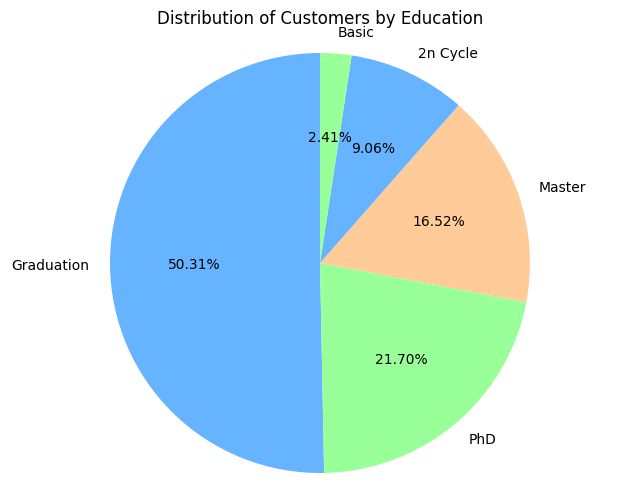

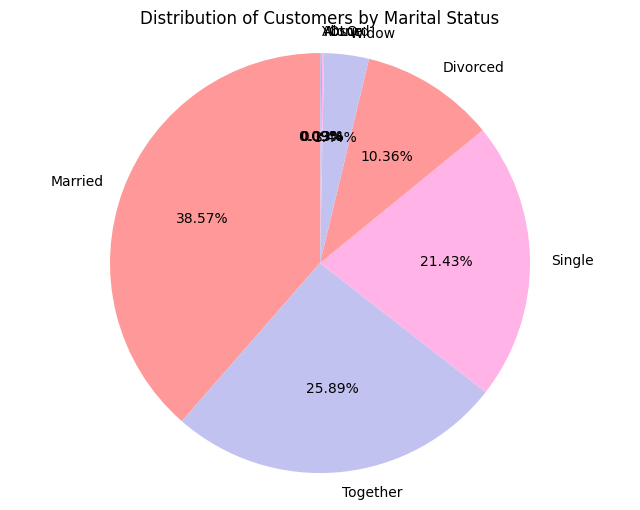

In [29]:
# Education: Count how many customers in each category
education_counts = df['Education'].value_counts()
print("Education counts:\n", education_counts)

# Marital_Status: Count how many customers in each category
marital_status_counts = df['Marital_Status'].value_counts()
print("\nMarital Status counts:\n", marital_status_counts)

# Plot pie chart for Education
plt.figure(figsize=(8,6))
plt.pie(education_counts, labels=education_counts.index, autopct='%1.2f%%', startangle=90, colors=['#66b3ff','#99ff99','#ffcc99'])
plt.title("Distribution of Customers by Education")
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

# Plot pie chart for Marital_Status
plt.figure(figsize=(8,6))
plt.pie(marital_status_counts, labels=marital_status_counts.index, autopct='%1.2f%%', startangle=90, colors=['#ff9999','#c2c2f0','#ffb3e6'])
plt.title("Distribution of Customers by Marital Status")
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


Based on the pie charts, most customers have higher education, suggesting the company targets educated adults. Additionally, the majority are married or in a relationship, indicating a focus on family-oriented households.

## 6. Numeric Variables (15pts)

* For `Income`, `Kidhome`, and `Teenhome`,
  * use boxplots to visualize their distributions.

* Based on these distributions, what can you say about the typical household profile of Nata's customers?

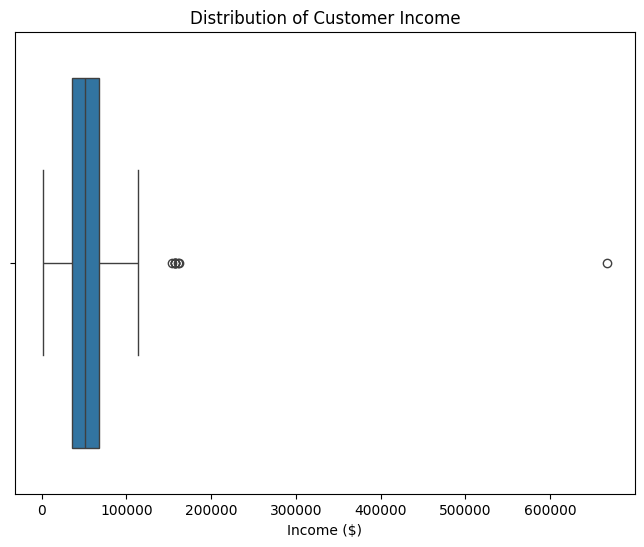

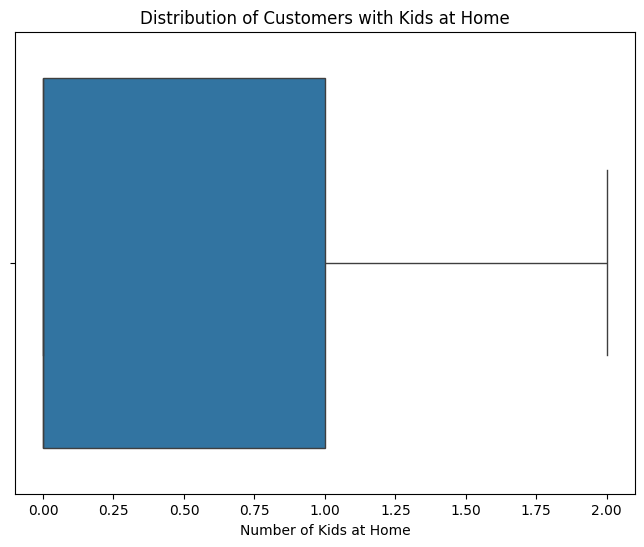

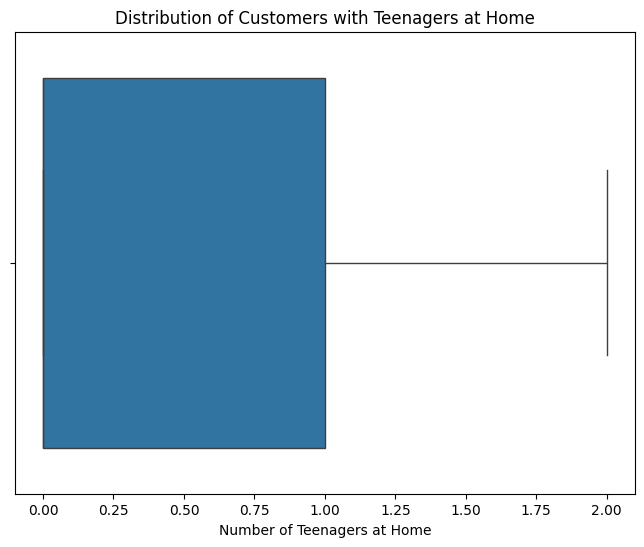

In [27]:
# Boxplot for Income
plt.figure(figsize=(8,6))
sns.boxplot(x=df['Income'])
plt.title("Distribution of Customer Income")
plt.xlabel("Income ($)")
plt.show()

# Boxplot for Kidhome (Number of kids at home)
plt.figure(figsize=(8,6))
sns.boxplot(x=df['Kidhome'])
plt.title("Distribution of Customers with Kids at Home")
plt.xlabel("Number of Kids at Home")
plt.show()

# Boxplot for Teenhome (Number of teenagers at home)
plt.figure(figsize=(8,6))
sns.boxplot(x=df['Teenhome'])
plt.title("Distribution of Customers with Teenagers at Home")
plt.xlabel("Number of Teenagers at Home")
plt.show()


Based on the boxplots, most customers have moderate incomes, with a few high-income outliers. The majority have 0 to 2 children, and few have teenagers at home. This suggests that Nata’s typical customers are middle-income families with young children or teenagers.

## 7. Spending by Products (15pts)

* Examine the spending amount columns `MntWines`,	`MntFruits`,	`MntMeatProducts`,	`MntFishProducts`,	`MntSweetProducts`,	`MntGoldProds`, and find the product with the highest total spending amount by all customers.



In [26]:
# Sum the spending for each product category
spending_cols = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
total_spending = df[spending_cols].sum()

# Find the product with the highest total spending
highest_spending_product = total_spending.idxmax()
highest_spending_amount = total_spending.max()

print(f"The product with the highest total spending is {highest_spending_product} with a total of ${highest_spending_amount:,.2f}.")


The product with the highest total spending is MntWines with a total of $680,816.00.


## 8. Use of Gen. AI (2pts)

Use of Generative AI is allowed. Briefly describe if and how you have used Gen. AI tools in this assignment.

I used Generative AI (ChatGPT) to help write and optimize the code for data cleaning, analysis, and visualization. It assisted in generating Python code for tasks like creating boxplots, handling missing values, and summarizing findings.